<a href="https://colab.research.google.com/github/Shaik-Suhana/python/blob/main/image%20clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install ipython-autotime
%load_ext autotime

time: 117 µs (started: 2021-02-20 07:34:06 +00:00)


In [1]:
!pip install bing-image-downloader 


In [2]:
!mkdir images

In [3]:
from bing_image_downloader import downloader
downloader.download("bikes",limit=11,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 11 Images on Page 1.


[%] Downloading Image #1 from https://www.setaswall.com/wp-content/uploads/2018/04/Beautiful-Landscape-Wallpaper-1080x2280-380x802.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://wallpapershome.com/images/wallpapers/autumn-forest-2160x3840-5k-4k-wallpaper-rocks-trees-plants-waterfall-584.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.setaswall.com/wp-content/uploads/2017/10/Fireworks-Wallpaper-1080x2160-380x760.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://wallpapershome.com/images/wallpapers/dj-marshmello-720x1280-dj-neon-4k-19771.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://hddesktopwallpapers.in/wp-content/uploads/2015/07/scary-halloween-wallpaper-hd-1200x500.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://wallpapershome.com/images/wallpapers/regensburg-7680x4320-germany-river-danube-8k-15888.jpg
[%] File Downloaded !

[%] Download

In [4]:
from bing_image_downloader import downloader
downloader.download("cars",limit=11,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 11 Images on Page 1.


[%] Downloading Image #1 from http://i1.ytimg.com/vi/4H2J0DtE6nY/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://lh6.ggpht.com/_LuWNwQ8bVQ8/S--GGCESPTI/AAAAAAAAIig/LsoRqexNrBw/Hot_bikes_babes_and_cars-6_thumb[2].jpg?imgmax=800
[%] File Downloaded !

[%] Downloading Image #3 from http://3.bp.blogspot.com/_BnOP43Mv_PY/S8lfIVpCnUI/AAAAAAAAQs4/bH8RTct7TSw/s1600/bumper+cars.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://images5.fanpop.com/image/photos/31200000/ASTON-MARTIN-VANQUISH-sports-cars-31233275-2560-1596.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://www.autoconception.com/wp-content/uploads/2012/12/Aston-Martin-Ducati-British-car-design-Investindustrial-InvestmentDar.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://www.autoconception.com/wp-content/uploads/2012/11/Shelby-Coupe-muscle-car-concept-design-5.jpg
[%] File Downloaded !

[%] Downloading

In [6]:
import numpy as np
 
a = np.array([[1,2,3,4,5],
             [4,5,6,7,8]])
a.ndim

2

time: 3.75 ms (started: 2021-02-20 07:34:35 +00:00)


In [7]:
a.flatten()

array([1, 2, 3, 4, 5, 4, 5, 6, 7, 8])

time: 11.4 ms (started: 2021-02-20 07:35:04 +00:00)


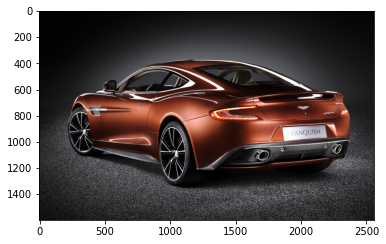

time: 38.8 s (started: 2021-02-20 07:35:44 +00:00)


In [8]:
#preprocessing
# resize
# flatten

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['bikes','cars']


for category in CATEGORIES:
  class_num = CATEGORIES.index(category) #label encoding the values
  path = os.path.join(DATADIR,category) # create path to use all the images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #print(img_array.shape)
    plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data) 
target = np.array(target)
images = np.array(images)

In [9]:
len(flat_data[0])

67500

time: 8.29 ms (started: 2021-02-20 07:38:04 +00:00)


In [10]:
150*150*3

67500

time: 3.37 ms (started: 2021-02-20 07:40:30 +00:00)


In [11]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

time: 4.64 ms (started: 2021-02-20 07:40:56 +00:00)


<BarContainer object of 2 artists>

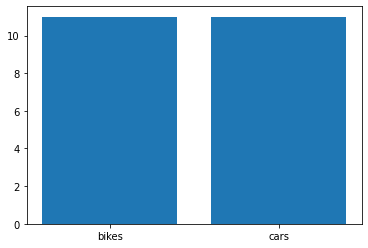

time: 135 ms (started: 2021-02-20 07:41:26 +00:00)


In [12]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [13]:
# split into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                  test_size=0.3,random_state=209)

time: 297 ms (started: 2021-02-20 07:42:03 +00:00)


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['rbf']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf'],
              }
]



svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 5.57 s (started: 2021-02-20 07:42:25 +00:00)


In [15]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1])

time: 16.5 ms (started: 2021-02-20 07:42:55 +00:00)


In [16]:
y_test

array([0, 0, 1, 1, 1, 0, 1])

time: 3.97 ms (started: 2021-02-20 07:43:17 +00:00)


In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 877 µs (started: 2021-02-20 07:43:46 +00:00)


In [18]:
accuracy_score(y_pred,y_test)

0.5714285714285714

time: 4 ms (started: 2021-02-20 07:44:21 +00:00)


In [19]:
confusion_matrix(y_pred,y_test)

array([[3, 3],
       [0, 1]])

time: 5.75 ms (started: 2021-02-20 07:44:47 +00:00)


In [20]:
# save the model using pickle library
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 27.3 ms (started: 2021-02-20 07:45:04 +00:00)


In [21]:
model = pickle.load(open('img_model.p','rb'))

time: 7.58 ms (started: 2021-02-20 07:45:25 +00:00)


Enter your URLhttps://tse4.mm.bing.net/th?id=OIP.y_2d35iqXmiH7-YsF2WwCQHaEK&pid=Api&P=0&w=299&h=169
(168, 299, 3)
 PREDICTED OUTPUT: cars


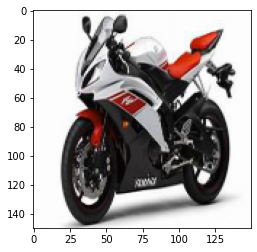

time: 1min (started: 2021-02-20 07:46:03 +00:00)


In [22]:
# testing a brand new image


flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')